Project ini merupakan tugas kelompok mata kuliah deep learning di semester 6. Dosen meminta untuk melakukan perbandingan hasil akurasi dari sebuah dataset menggunakan masing-masing 3 algoritma machine learning dan deep learning.
Kelompok saya terdiri dari 3 anggota dan menggunakan healthcare stroke dataset yang diambil dari halaman https://www.kaggle.com/fedesoriano/stroke-prediction-dataset.
Algoritma machine learning yang digunakan yaitu Naive Bayes, Decission Tree, dan SVM.
Algoritma deep learning yang digunakan yaitu CONV1D, RNN-LSTM, dan RNN-GRU 

# **1. Mempersiapkan Dataset**

Link Dataset Stroke Prediction : https://www.kaggle.com/fedesoriano/stroke-prediction-dataset
<br> Attribute Information :<br>
1) id: unique identifier<br>
2) gender: "Male", "Female" or "Other"<br>
3) age: age of the patient<br>
4) hypertension: 0 if the patient doesn't have hypertension, 1 if the patient has hypertension<br>
5) heart_disease: 0 if the patient doesn't have any heart diseases, 1 if the patient has a heart disease<br>
6) ever_married: "No" or "Yes"<br>
7) work_type: "children", "Govt_jov", "Never_worked", "Private" or "Self-employed"<br>
8) Residence_type: "Rural" or "Urban"<br>
9) avg_glucose_level: average glucose level in blood<br>
10) bmi: body mass index<br>
11) smoking_status: "formerly smoked", "never smoked", "smokes" or "Unknown"*<br>
12) stroke: 1 if the patient had a stroke or 0 if not<br>
*Note: "Unknown" di smoking_status berarti informasi tidak tersedia untuk pasien ini

In [ ]:
#Mengimpor library yang akan digunakan dalam melakukan pre-processing data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


#Library untuk model
from tensorflow.keras.models import Sequential
from keras.optimizers import Adam, SGD
from tensorflow.keras.layers import Dense, Dropout, LSTM
from keras.layers.recurrent import GRU
from keras.layers import Flatten, Conv1D, MaxPool1D
from keras.callbacks import ModelCheckpoint

In [ ]:
#Melakukan read data csv menggunakan pandas
df = pd.read_csv("healthcare-dataset-stroke-data.csv")

In [ ]:
#Menampilkan 5 data pertama
df.head()
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [ ]:
#Melihat detail dari setiap kolom
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


# **2. Data Visualisasi dan Data Pre-Processing**

### Data Visualisasi

In [ ]:
#Membuat data dengan label untuk melakukan visualisasi
df_label = pd.read_csv("healthcare-dataset-stroke-data.csv")
df_label = df_label.drop('id', axis=1)
df_label['bmi'] = df['bmi']

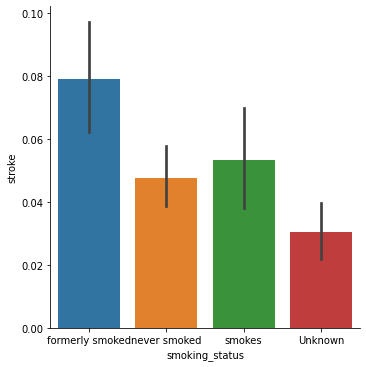

<Figure size 1800x1800 with 0 Axes>

In [ ]:
# Melakukan visualisasi dari catplot untuk kolom smoking_status dan kolom stroke

sns.catplot(x="smoking_status", y="stroke", kind="bar", data=df)
plt.figure(figsize=(25, 25))
plt.show()

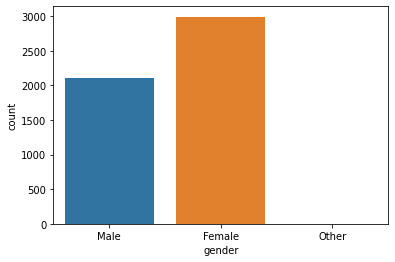

<Figure size 360x360 with 0 Axes>

In [ ]:
# Visualisasi data pasien berdasarkan jenis kelamin/gender

sns.countplot(x="gender", data=df)
plt.figure(figsize=(5, 5))
plt.show()

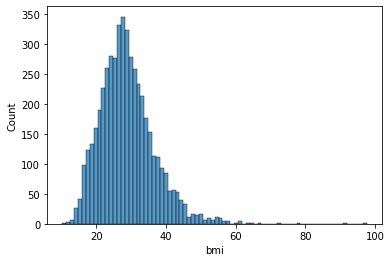

In [ ]:
# Menampilkan histogram dari bmi
sns.histplot(x='bmi', data=df_label)

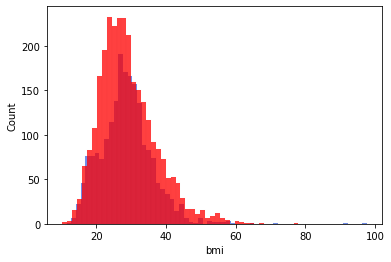

In [ ]:
#Menampilkan bmi(body mass index) berdasarkan gender dalam plot area yang sama
sns.histplot(x='bmi', data=df_label[df_label["gender"]=="Male"], linewidth=0.01, color="royalblue")
sns.histplot(x='bmi', data=df_label[df_label["gender"]=="Female"], linewidth=0.01, color="red")

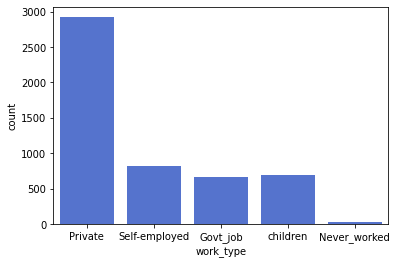

In [ ]:
# Membuat countplot untuk kolom work_type
sns.countplot(x="work_type", data=df_label, color="royalblue")

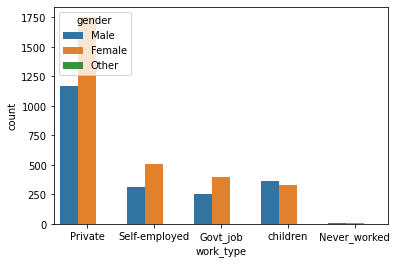

In [ ]:
# Membuat countplot work_type berdasarkan gender
sns.countplot(x="work_type", data=df_label, hue="gender")# set hue=gender

### 2. Data Pre-Processing

In [ ]:
#Menghilangkan kolom id karena tidak digunakan
df = df.drop('id', axis=1)

In [ ]:
#Menampilkan deskriptif statistik dari dataset sebelum di lakukan preprocessing
df.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [ ]:
#Mendeteksi baris data yang bernilai Nan atau kosong 
df.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [ ]:
# Mengubah nilai nan/kosong menjadi nilai mean
mean = df.mean()
df = df.replace(np.nan, mean)
df.head(10)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1
5,Male,81.0,0,0,Yes,Private,Urban,186.21,29.000000,formerly smoked,1
6,Male,74.0,1,1,Yes,Private,Rural,70.09,27.400000,never smoked,1
7,Female,69.0,0,0,No,Private,Urban,94.39,22.800000,never smoked,1
8,Female,59.0,0,0,Yes,Private,Rural,76.15,28.893237,Unknown,1
9,Female,78.0,0,0,Yes,Private,Urban,58.57,24.200000,Unknown,1


In [ ]:
# Mengubah/Encode kategori dari tipe data string menjadi tipe integer
from sklearn.preprocessing import OneHotEncoder 

df["gender"] = pd.factorize(df.gender) [0]
df["gender"] = pd.get_dummies(df["gender"])
df['ever_married'] = pd.get_dummies(df["ever_married"])
df["work_type"] = pd.get_dummies(df["work_type"])
df["Residence_type"] = pd.get_dummies(df["Residence_type"])
df["smoking_status"] = pd.get_dummies(df["smoking_status"])
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,0,0,0,228.69,36.600000,0,1
1,0,61.0,0,0,0,0,1,202.21,28.893237,0,1
2,1,80.0,0,1,0,0,1,105.92,32.500000,0,1
3,0,49.0,0,0,0,0,0,171.23,34.400000,0,1
4,0,79.0,1,0,0,0,1,174.12,24.000000,0,1


In [ ]:
# Menampilkan kembali desktriptif statistik yang telah di preprocessing
df.describe()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000
mean,0.413894,43.226614,0.097456,0.054012,0.343836,0.128571,0.491977,106.147677,28.893237,0.302153,0.048728
std,0.492578,22.612647,0.296607,0.226063,0.475034,0.334758,0.499985,45.283560,7.698018,0.459236,0.215320
min,0.000000,0.080000,0.000000,0.000000,0.000000,0.000000,0.000000,55.120000,10.300000,0.000000,0.000000
25%,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,77.245000,23.800000,0.000000,0.000000
50%,0.000000,45.000000,0.000000,0.000000,0.000000,0.000000,0.000000,91.885000,28.400000,0.000000,0.000000
75%,1.000000,61.000000,0.000000,0.000000,1.000000,0.000000,1.000000,114.090000,32.800000,1.000000,0.000000
max,1.000000,82.000000,1.000000,1.000000,1.000000,1.000000,1.000000,271.740000,97.600000,1.000000,1.000000


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

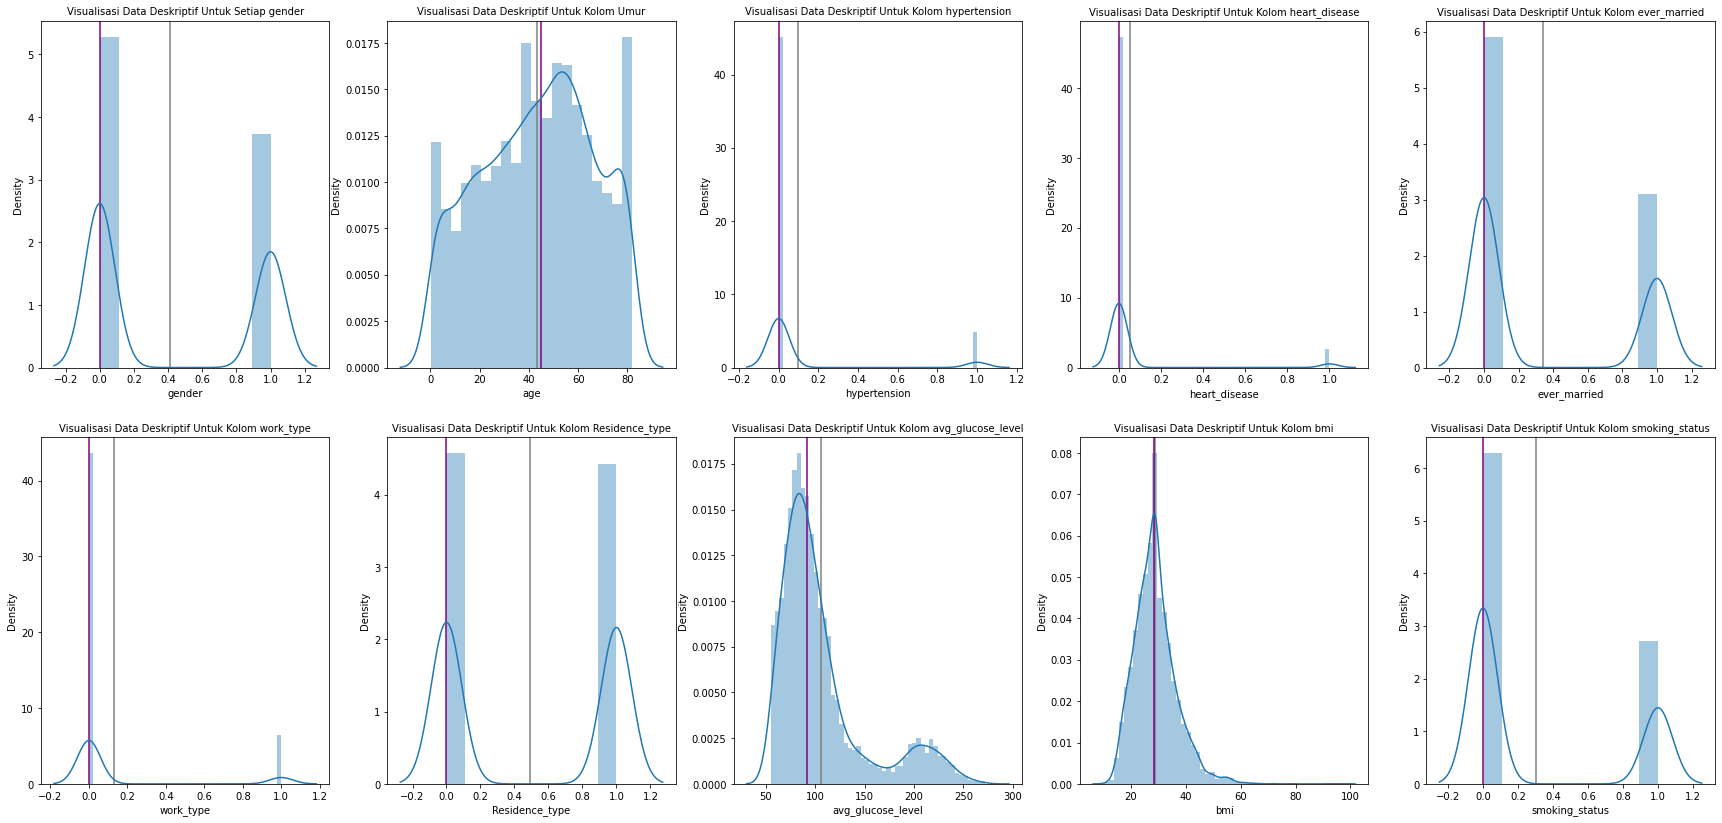

In [ ]:
# Setelah melakukan deskriptif statistik, kemudian dilakukan visualisasi data deskriptif untuk kolom yang telah di preprocessing
plt.figure(figsize = (30, 60))

# Melakukan visualisasi data deskritif untuk kolom gender
plt.subplot(8,5,1)
plt.axvline(df["gender"].mean(), color = "gray")
plt.axvline(df["gender"].median(), color = "purple", label = "median")
plt.title("Visualisasi Data Deskriptif Untuk Setiap gender", fontsize=10)
sns.distplot(df["gender"])

# Melakukan visualisasi data deskriptif untuk kolom age
plt.subplot(8,5,2)
plt.axvline(df["age"].mean(), label="mean", color="gray")
plt.axvline(df["age"].median(), label="median", color="purple")
plt.title("Visualisasi Data Deskriptif Untuk Kolom Umur", fontsize=10)
sns.distplot(df["age"])

# Melakukan visualisasi data deskriptif untuk kolom hypertension
plt.subplot(8,5,3)
plt.axvline(df["hypertension"].mean(), label="mean", color="gray")
plt.axvline(df["hypertension"].median(), label="median", color="purple")
plt.title("Visualisasi Data Deskriptif Untuk Kolom hypertension", fontsize=10)
sns.distplot(df["hypertension"])

# Melakukan visualisasi data deskriptif untuk kolom heart_disease
plt.subplot(8,5,4)
plt.axvline(df["heart_disease"].mean(), label="mean", color="gray")
plt.axvline(df["heart_disease"].median(), label="median", color="purple")
plt.title("Visualisasi Data Deskriptif Untuk Kolom heart_disease", fontsize=10)
sns.distplot(df["heart_disease"])

# Melakukan visualisasi data deskriptif untuk kolom ever_married
plt.subplot(8,5,5)
plt.axvline(df["ever_married"].mean(), label="mean", color="gray")
plt.axvline(df["ever_married"].median(), label="median", color="purple")
plt.title("Visualisasi Data Deskriptif Untuk Kolom ever_married", fontsize=10)
sns.distplot(df["ever_married"])

# Melakukan visualisasi data deskriptif untuk kolom work_type
plt.subplot(8,5,6)
plt.axvline(df["work_type"].mean(), label="mean", color="gray")
plt.axvline(df["work_type"].median(), label="median", color="purple")
plt.title("Visualisasi Data Deskriptif Untuk Kolom work_type", fontsize=10)
sns.distplot(df["work_type"])

# Melakukan visualisasi data deskriptif untuk kolom Residence_type
plt.subplot(8,5,7)
plt.axvline(df["Residence_type"].mean(), label="mean", color="gray")
plt.axvline(df["Residence_type"].median(), label="median", color="purple")
plt.title("Visualisasi Data Deskriptif Untuk Kolom Residence_type", fontsize=10)
sns.distplot(df["Residence_type"])

# Melakukan visualisasi data deskriptif untuk kolom avg_glucose_level
plt.subplot(8,5,8)
plt.axvline(df["avg_glucose_level"].mean(), label="mean", color="gray")
plt.axvline(df["avg_glucose_level"].median(), label="median", color="purple")
plt.title("Visualisasi Data Deskriptif Untuk Kolom avg_glucose_level", fontsize=10)
sns.distplot(df["avg_glucose_level"])

# Melakukan visualisasi data deskriptif untuk kolom bmi
plt.subplot(8,5,9)
plt.axvline(df["bmi"].mean(), label="mean", color="gray")
plt.axvline(df["bmi"].median(), label="median", color="purple")
plt.title("Visualisasi Data Deskriptif Untuk Kolom bmi", fontsize=10)
sns.distplot(df["bmi"])

# Melakukan visualisasi data deskriptif untuk kolom smoking status
plt.subplot(8,5,10)
plt.axvline(df["smoking_status"].mean(), label="mean", color="gray")
plt.axvline(df["smoking_status"].median(), label="median", color="purple")
plt.title("Visualisasi Data Deskriptif Untuk Kolom smoking_status", fontsize=10)
sns.distplot(df["smoking_status"])

Text(0.5, 1.0, 'Korelasi Data Stroke Pre-Processing')

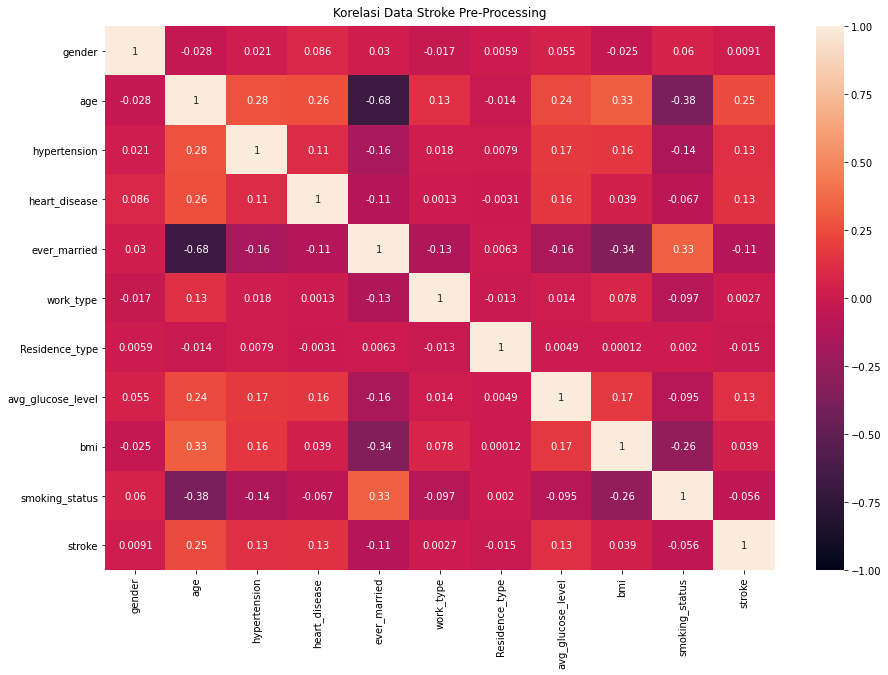

In [ ]:
# Membuat heatmap korelasi dataset
plt.figure(figsize=(15, 10))

corr_data_stroke = sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True)
corr_data_stroke.set_title("Korelasi Data Stroke Pre-Processing", fontdict={"fontsize":12}, pad=10)

# **3. Mempersiapkan Data Train dan Data Test**

In [ ]:
# Membagi data kedalam variabel x dan y
x = df.drop(["stroke"], axis=1)
y = df["stroke"]

In [ ]:
#Melakukan split data menjadi data train dan data test
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=3)
print("Data Train : ", x_train.shape, y_train.shape)
print("Data Test :", x_test.shape, y_test.shape)

Data Train :  (4088, 10) (4088,)
Data Test : (1022, 10) (1022,)


In [ ]:
#Melakukan penskalaan dan standarisasi fitur menggunakan StandardScaler
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)

# **4. ML Modelling**

In [ ]:
#Import Gaussian Naive Bayes model
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

#Create a Gaussian Classifier
model = GaussianNB()
print(model)

GaussianNB(priors=None, var_smoothing=1e-09)


In [ ]:
# Train the model using the training sets
import sklearn.metrics as metrics
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

cm = confusion_matrix(y_test, y_pred)
acc = accuracy_score(y_test, y_pred)
print(acc)
print(cm)
#classification report
print(metrics.classification_report(y_test,y_pred))

0.860078277886497
[[861 116]
 [ 27  18]]
              precision    recall  f1-score   support

           0       0.97      0.88      0.92       977
           1       0.13      0.40      0.20        45

    accuracy                           0.86      1022
   macro avg       0.55      0.64      0.56      1022
weighted avg       0.93      0.86      0.89      1022



In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
clf_tree = DecisionTreeClassifier( criterion="gini", max_depth=4,random_state=1)

clf_tree.fit(x_train, y_train)

y_pred = clf_tree.predict(x_test)

cm = confusion_matrix(y_test, y_pred)
acc = accuracy_score(y_test, y_pred)
print(acc)
print(cm)
#classification report
print(metrics.classification_report(y_test,y_pred))

0.9549902152641878
[[976   1]
 [ 45   0]]
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       977
           1       0.00      0.00      0.00        45

    accuracy                           0.95      1022
   macro avg       0.48      0.50      0.49      1022
weighted avg       0.91      0.95      0.93      1022



In [ ]:
from sklearn.svm import SVC

from sklearn import svm
#create a classifier
cls = svm.SVC(kernel="linear")
#train the model
cls.fit(x_train, y_train)
#predict the response
pred = cls.predict(x_test)

from sklearn import metrics
#classification report
print(metrics.classification_report(y_test,y_pred=pred))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98       977
           1       0.00      0.00      0.00        45

    accuracy                           0.96      1022
   macro avg       0.48      0.50      0.49      1022
weighted avg       0.91      0.96      0.93      1022



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# **IMPLEMENTASI MODEL DEEP LEARNING**

In [ ]:
# Melakukan Reshape pada variabel x_train dan x_test
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

# **5. Model Conv1D**

In [ ]:
# Membuat jaringan syarat tiruan untuk model CNN
model = Sequential()
 
# Membuat layer pertama
model.add(Conv1D(filters=150, kernel_size=1, activation='relu', input_shape=(x_train.shape[1], x_train.shape[2])))
# Menambahkan nilai dropout untuk mencegah overfitting
model.add(Dropout(0.2))

# Membuat lapisan/layer kedua
model.add(Conv1D(filters=100, kernel_size=1, activation='relu', input_shape=(x_train.shape[1], x_train.shape[2])))
# Menambahkan nilai dropout untuk mencegah overfitting
model.add(Dropout(0.2))

# manambah layer ketiga
model.add(Conv1D(filters=10, kernel_size=1, activation='relu', input_shape=(x_train.shape[1], x_train.shape[2])))
model.add(MaxPool1D(pool_size=2))
model.add(Flatten())

# Menambahkan lapisan paling luar
model.add(Dense(1))
# Melihat rancangan network CNN yang telah dibuat
model.summary()

opt = Adam(lr=.001)
 
# Compile CNN dengan nilai opt, loss, dan matrics
model.compile(optimizer =opt, loss = 'mean_squared_error', metrics=['accuracy'])

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 10, 150)           300       
_________________________________________________________________
dropout (Dropout)            (None, 10, 150)           0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 10, 100)           15100     
_________________________________________________________________
dropout_1 (Dropout)          (None, 10, 100)           0         
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 10, 10)            1010      
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 5, 10)             0         
_________________________________________________________________
flatten (Flatten)            (None, 50)                0

In [ ]:
# Membuat model jaringan syaraf tiruan untuk model CNN
history = model.fit(x_train, y_train, epochs = 20, batch_size = 250, validation_data=(x_test, y_test))

Epoch 1/20
17/17 [==============================] - 0s 29ms/step - loss: 0.0451 - accuracy: 0.9501 - val_loss: 0.0403 - val_accuracy: 0.9560
Epoch 2/20
17/17 [==============================] - 0s 28ms/step - loss: 0.0448 - accuracy: 0.9501 - val_loss: 0.0401 - val_accuracy: 0.9560
Epoch 3/20
17/17 [==============================] - 0s 26ms/step - loss: 0.0446 - accuracy: 0.9501 - val_loss: 0.0400 - val_accuracy: 0.9560
Epoch 4/20
17/17 [==============================] - 0s 26ms/step - loss: 0.0446 - accuracy: 0.9501 - val_loss: 0.0401 - val_accuracy: 0.9560
Epoch 5/20
17/17 [==============================] - 0s 26ms/step - loss: 0.0447 - accuracy: 0.9501 - val_loss: 0.0402 - val_accuracy: 0.9560
Epoch 6/20
17/17 [==============================] - 0s 26ms/step - loss: 0.0449 - accuracy: 0.9501 - val_loss: 0.0400 - val_accuracy: 0.9560
Epoch 7/20
17/17 [==============================] - 0s 25ms/step - loss: 0.0445 - accuracy: 0.9501 - val_loss: 0.0403 - val_accuracy: 0.9560
Epoch 8/20
17

In [ ]:
from sklearn.metrics import classification_report
# Melakukan pengujian untuk variabel test dan variabel train
print("------------Prediksi dari variabel test------------------")
y_pred_test = model.predict(x_test)
print(y_pred_test)

print("------------Prediksi dari variabel train-----------------")
y_pred_train = model.predict(x_train)
print(y_pred_train)

------------Prediksi dari variabel test------------------
[[0.02627105]
 [0.05363292]
 [0.01621339]
 ...
 [0.13157707]
 [0.04201282]
 [0.0771184 ]]
------------Prediksi dari variabel train-----------------
[[0.09338869]
 [0.07009763]
 [0.17536628]
 ...
 [0.05448901]
 [0.01739026]
 [0.01965494]]


In [ ]:
# Menampilkan tingkat akurasi, precision, recall & f1-score dari model CNN
print("-----------------------Variabel Test-------------------------------")
print(classification_report(y_test, y_pred_test.round()))

print("-----------------------Variabel Train------------------------------")
print(classification_report(y_train, y_pred_train.round()))

-----------------------Variabel Test-------------------------------
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       977
           1       0.00      0.00      0.00        45

    accuracy                           0.96      1022
   macro avg       0.48      0.50      0.49      1022
weighted avg       0.91      0.96      0.93      1022

-----------------------Variabel Train------------------------------
              precision    recall  f1-score   support

           0       0.95      1.00      0.97      3884
           1       0.00      0.00      0.00       204

    accuracy                           0.95      4088
   macro avg       0.48      0.50      0.49      4088
weighted avg       0.90      0.95      0.93      4088



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
print("Tingkat Akurasi Data Train Di CNN :", model.evaluate(x_train, y_train))
print("Tingkat Akurasi Data Test Di CNN :", model.evaluate(x_test, y_test))

128/128 [==============================] - 0s 2ms/step - loss: 0.0439 - accuracy: 0.9501
Tingkat Akurasi Data Train Di CNN : [0.043869223445653915, 0.9500978589057922]
32/32 [==============================] - 0s 1ms/step - loss: 0.0400 - accuracy: 0.9560
Tingkat Akurasi Data Test Di CNN : [0.03998563438653946, 0.9559686779975891]


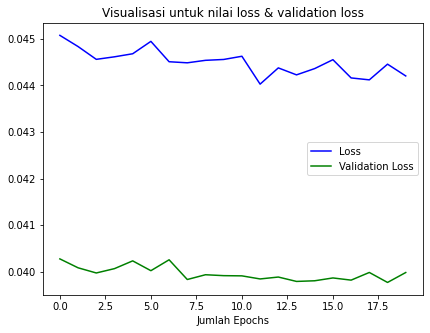

In [ ]:
# Membuat visualisasi dari hasil neural network antara loss, validation loss dan akurasi, validation akurasi
plt.figure(figsize=(15,5))

# Membuat visualisasi untuk nilai loss dan validation loss
plt.subplot(1,2,1)
plt.plot(history.history['loss'], color="blue", label="Loss")
plt.plot(history.history['val_loss'], color="green", label="Validation Loss")
plt.title("Visualisasi untuk nilai loss & validation loss")
plt.xlabel("Jumlah Epochs")
plt.legend()

# **6. Model RNN GRU**

In [ ]:
# Membuat jaringan syarat tiruan untuk model RNN dengan layer GRU
model = Sequential()
 
# Menambah layer RNN yang pertama dan Dropout regularisation
model.add(GRU(units = 150, return_sequences = True, input_shape = (x_train.shape[1], 1)))
model.add(Dropout(0.2))
 
# Menambah layer RNN yang kedua dan Dropout regularisation
model.add(GRU(units = 100, return_sequences = True))
model.add(Dropout(0.2))
 
# Menambah layer RNN yang ketiga dan Dropout regularisation
model.add(GRU(units = 50, return_sequences = True))
model.add(Dropout(0.2))
 
# Menambah layer RNN yang keempat dan Dropout regularisation
model.add(GRU(units = 23))
model.add(Dropout(0.2))

# Menambah layer output dan dropout regularisation
model.add(Dense(units = 1))
model.add(Dropout(0.2))

# Melihat rancangan neural network pada model RNN
model.summary()

opt = Adam(lr=.001)
 
# Compile RNN dengan nilai opt, loss, dan matrics
model.compile(optimizer =opt, loss = 'mean_squared_error', metrics=['accuracy'])

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru (GRU)                    (None, 10, 150)           68850     
_________________________________________________________________
dropout_2 (Dropout)          (None, 10, 150)           0         
_________________________________________________________________
gru_1 (GRU)                  (None, 10, 100)           75600     
_________________________________________________________________
dropout_3 (Dropout)          (None, 10, 100)           0         
_________________________________________________________________
gru_2 (GRU)                  (None, 10, 50)            22800     
_________________________________________________________________
dropout_4 (Dropout)          (None, 10, 50)            0         
_________________________________________________________________
gru_3 (GRU)                  (None, 23)               

In [ ]:
# Membuat model jaringan syaraf tiruan untuk model RNN dengan layer GRU 
history = model.fit(x_train, y_train, epochs = 20, batch_size = 100, validation_data=(x_test, y_test))

Epoch 1/20
41/41 [==============================] - 11s 106ms/step - loss: 0.0502 - accuracy: 0.9487 - val_loss: 0.0409 - val_accuracy: 0.9560
Epoch 2/20
41/41 [==============================] - 3s 75ms/step - loss: 0.0430 - accuracy: 0.9555 - val_loss: 0.0410 - val_accuracy: 0.9560
Epoch 3/20
41/41 [==============================] - 3s 74ms/step - loss: 0.0462 - accuracy: 0.9526 - val_loss: 0.0411 - val_accuracy: 0.9560
Epoch 4/20
41/41 [==============================] - 3s 74ms/step - loss: 0.0454 - accuracy: 0.9517 - val_loss: 0.0415 - val_accuracy: 0.9560
Epoch 5/20
41/41 [==============================] - 3s 74ms/step - loss: 0.0455 - accuracy: 0.9525 - val_loss: 0.0407 - val_accuracy: 0.9560
Epoch 6/20
41/41 [==============================] - 3s 74ms/step - loss: 0.0432 - accuracy: 0.9546 - val_loss: 0.0411 - val_accuracy: 0.9560
Epoch 7/20
41/41 [==============================] - 3s 74ms/step - loss: 0.0516 - accuracy: 0.9448 - val_loss: 0.0407 - val_accuracy: 0.9560
Epoch 8/20


In [ ]:
from sklearn.metrics import classification_report
# Melakukan pengujian untuk variabel test dan variabel train
print("------------Prediksi dari variabel test------------------")
y_pred_test = model.predict(x_test)
print(y_pred_test)

print("------------Prediksi dari variabel train-----------------")
y_pred_train = model.predict(x_train)
print(y_pred_train)

------------Prediksi dari variabel test------------------
[[0.02568712]
 [0.06146633]
 [0.0506009 ]
 ...
 [0.08373258]
 [0.03521054]
 [0.04394751]]
------------Prediksi dari variabel train-----------------
[[0.04859834]
 [0.05395908]
 [0.09024334]
 ...
 [0.05440899]
 [0.01311413]
 [0.0310502 ]]


In [ ]:
# Menampilkan tingkat akurasi, precision, recall & f1-score dari model RNN

print("-----------------------Variabel Test-------------------------------")
print(classification_report(y_test, y_pred_test.round()))

print("-----------------------Variabel Train------------------------------")
print(classification_report(y_train, y_pred_train.round()))

-----------------------Variabel Test-------------------------------
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       977
           1       0.00      0.00      0.00        45

    accuracy                           0.96      1022
   macro avg       0.48      0.50      0.49      1022
weighted avg       0.91      0.96      0.93      1022

-----------------------Variabel Train------------------------------
              precision    recall  f1-score   support

           0       0.95      1.00      0.97      3884
           1       0.00      0.00      0.00       204

    accuracy                           0.95      4088
   macro avg       0.48      0.50      0.49      4088
weighted avg       0.90      0.95      0.93      4088



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
print("Akurasi Data Train Di RNN:", model.evaluate(x_train, y_train))
print("Akurasi Data Test Di RNN:", model.evaluate(x_test, y_test))

128/128 [==============================] - 1s 8ms/step - loss: 0.0454 - accuracy: 0.9501
Akurasi Data Train Di RNN: [0.045406606048345566, 0.9500978589057922]
32/32 [==============================] - 0s 9ms/step - loss: 0.0403 - accuracy: 0.9560
Akurasi Data Test Di RNN: [0.04028851538896561, 0.9559686779975891]


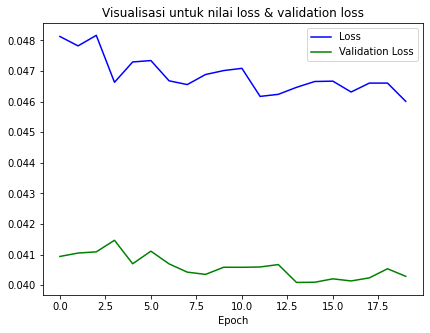

In [ ]:
# Membuat visualisasi dari hasil neural network antara loss, validation loss dan akurasi, validation akurasi

plt.figure(figsize=(15,5))
# Membuat visualisasi untuk nilai loss dan validation loss
plt.subplot(1,2,1)
plt.plot(history.history['loss'], color="blue", label="Loss")
plt.plot(history.history['val_loss'], color="green", label="Validation Loss")
plt.title("Visualisasi untuk nilai loss & validation loss")
plt.xlabel("Epoch")
plt.legend()

# **7. Model RNN LSTM**

In [ ]:
# Membuat jaringan syarat tiruan untuk model RNN dengan layer LSTM
model = Sequential()
 
# Menambah layer RNN yang pertama dan Dropout regularisation
model.add(LSTM(units = 150, return_sequences = True, input_shape = (x_train.shape[1], 1)))
model.add(Dropout(0.2))
 
# Menambah layer RNN yang kedua dan Dropout regularisation
model.add(LSTM(units = 100, return_sequences = True))
model.add(Dropout(0.2))
 
# Menambah layer RNN yang ketiga dan Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))
 
# Menambah layer RNN yang keempat dan Dropout regularisation
model.add(LSTM(units = 23))
model.add(Dropout(0.2))

# Menambah layer output dan dropout regularisation
model.add(Dense(units = 1))
model.add(Dropout(0.2))

# Melihat rancangan neural network pada model RNN
model.summary()

opt = Adam(lr=.001)
 
# Compile RNN dengan nilai opt, loss, dan matrics
model.compile(optimizer =opt, loss = 'mean_squared_error', metrics=['accuracy'])

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 10, 150)           91200     
_________________________________________________________________
dropout_7 (Dropout)          (None, 10, 150)           0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 10, 100)           100400    
_________________________________________________________________
dropout_8 (Dropout)          (None, 10, 100)           0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 10, 50)            30200     
_________________________________________________________________
dropout_9 (Dropout)          (None, 10, 50)            0         
_________________________________________________________________
lstm_3 (LSTM)                (None, 23)               

In [ ]:
# Membuat model jaringan syaraf tiruan untuk model RNN dengan layer LSTM 
history = model.fit(x_train, y_train, epochs = 20, batch_size = 100, validation_data=(x_test, y_test))

Epoch 1/20
41/41 [==============================] - 11s 121ms/step - loss: 0.0466 - accuracy: 0.9508 - val_loss: 0.0410 - val_accuracy: 0.9560
Epoch 2/20
41/41 [==============================] - 3s 84ms/step - loss: 0.0430 - accuracy: 0.9544 - val_loss: 0.0407 - val_accuracy: 0.9560
Epoch 3/20
41/41 [==============================] - 3s 85ms/step - loss: 0.0461 - accuracy: 0.9508 - val_loss: 0.0418 - val_accuracy: 0.9560
Epoch 4/20
41/41 [==============================] - 3s 84ms/step - loss: 0.0459 - accuracy: 0.9505 - val_loss: 0.0407 - val_accuracy: 0.9560
Epoch 5/20
41/41 [==============================] - 3s 85ms/step - loss: 0.0440 - accuracy: 0.9528 - val_loss: 0.0408 - val_accuracy: 0.9560
Epoch 6/20
41/41 [==============================] - 3s 85ms/step - loss: 0.0476 - accuracy: 0.9488 - val_loss: 0.0407 - val_accuracy: 0.9560
Epoch 7/20
41/41 [==============================] - 3s 84ms/step - loss: 0.0438 - accuracy: 0.9532 - val_loss: 0.0411 - val_accuracy: 0.9560
Epoch 8/20


In [ ]:
from sklearn.metrics import classification_report
# Melakukan pengujian untuk variabel test dan variabel train
print("------------Prediksi dari variabel test------------------")
y_pred_test = model.predict(x_test)
print(y_pred_test)

print("------------Prediksi dari variabel train-----------------")
y_pred_train = model.predict(x_train)
print(y_pred_train)

------------Prediksi dari variabel test------------------
[[-0.00394322]
 [ 0.04454249]
 [ 0.00095494]
 ...
 [ 0.13436042]
 [ 0.00058824]
 [ 0.02682848]]
------------Prediksi dari variabel train-----------------
[[ 0.0456508 ]
 [ 0.08696242]
 [ 0.16768323]
 ...
 [ 0.00478775]
 [-0.01009513]
 [ 0.00893169]]


In [ ]:
# Menampilkan tingkat akurasi, precision, recall & f1-score dari model RNN

print("-----------------------Variabel Test-------------------------------")
print(classification_report(y_test, y_pred_test.round()))

print("-----------------------Variabel Train------------------------------")
print(classification_report(y_train, y_pred_train.round()))

-----------------------Variabel Test-------------------------------
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       977
           1       0.00      0.00      0.00        45

    accuracy                           0.96      1022
   macro avg       0.48      0.50      0.49      1022
weighted avg       0.91      0.96      0.93      1022

-----------------------Variabel Train------------------------------
              precision    recall  f1-score   support

           0       0.95      1.00      0.97      3884
           1       0.00      0.00      0.00       204

    accuracy                           0.95      4088
   macro avg       0.48      0.50      0.49      4088
weighted avg       0.90      0.95      0.93      4088



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
print("Akurasi Data Train Di RNN:", model.evaluate(x_train, y_train))
print("Akurasi Data Test Di RNN:", model.evaluate(x_test, y_test))

128/128 [==============================] - 1s 10ms/step - loss: 0.0443 - accuracy: 0.9501
Akurasi Data Train Di RNN: [0.04430205002427101, 0.9500978589057922]
32/32 [==============================] - 0s 10ms/step - loss: 0.0399 - accuracy: 0.9560
Akurasi Data Test Di RNN: [0.03992284834384918, 0.9559686779975891]


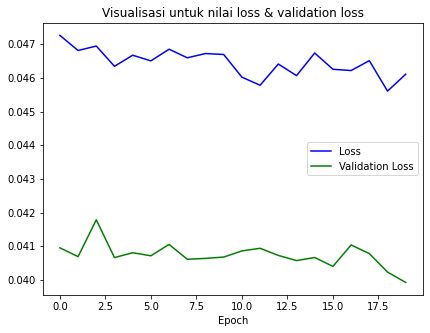

In [ ]:
# Membuat visualisasi dari hasil neural network antara loss, validation loss dan akurasi, validation akurasi

plt.figure(figsize=(15,5))
# Membuat visualisasi untuk nilai loss dan validation loss
plt.subplot(1,2,1)
plt.plot(history.history['loss'], color="blue", label="Loss")
plt.plot(history.history['val_loss'], color="green", label="Validation Loss")
plt.title("Visualisasi untuk nilai loss & validation loss")
plt.xlabel("Epoch")
plt.legend()